In this scenario, We're working for a company that creates data science content, 
* be it books, 
* online articles, 
* videos or 
* interactive text-based platforms like Synergic Data Tech (SDT).

We're tasked with figuring out what is best content to write about. Because we took this course, we know that given the lack of instructions there's some leeway in what "best" means here.

Since we're passionate about helping people learn, we decide to scower the internet in search for the answer to the question **What is it that people want to learn about in data science?** (as opposed to determining the most profitable content, for instance).

Thinking back to our experience when we first started learning programming, it occurs to us that if we wanted to figure out what programming content to write, we could consult [Stack Overflow](https://stackoverflow.com/) (a question and answer website about programming) and see what kind of content is more popular.

We decide to investigate Stack Overflow a little more and find out that it is part of a question and answer [website network](https://stackexchange.com/) called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, 
* physics, 
* philosophy, and 
* [data science!](https://datascience.stackexchange.com/) 

Here's a sample of the most popular sites:

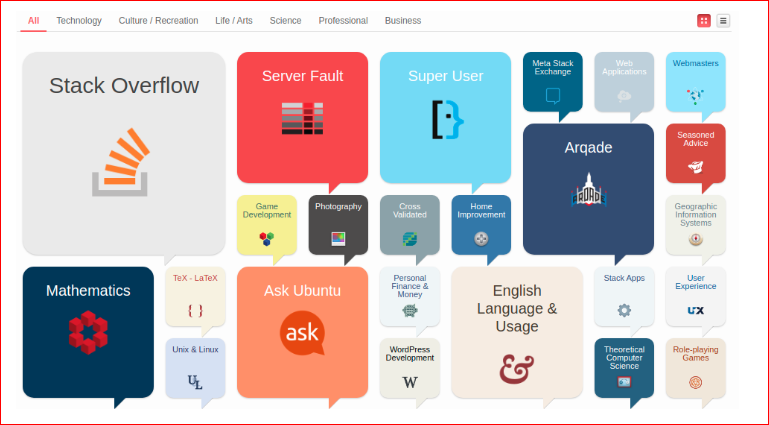

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

If we're not familiar with Stack Overflow or any other Stack Exchange site, we can check out [this](https://stackexchange.com/tour) tour.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated](https://stats.stackexchange.com/) — a statistics site
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/)

And if we want to include Data Engineering, we can also consider:

* [Database Administrators](https://dba.stackexchange.com/);
* [Unix & Linux](https://unix.stackexchange.com/);
* [Software Engineering](https://softwareengineering.stackexchange.com/);

If we open [Stack Exchange](https://stackexchange.com/sites?view=list#percentanswered), We'll find a complete list of Stack Exchange websites sorted by percentage of questions that received answers. At the time of this writing, **Data Science Stack Exchange (DSSE)** is on the bottom 10 sites with respect to this metric.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of an unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this project.

After a spending some time investigating the website, we decide that the tags will be very useful in categorizing content.

Now comes the challenge of accessing the data en masse. One potential solution would be to scrape the site. However we have an easier alternative

Stack Exchange provides a public data base for each of its websites. [Here's](https://data.stackexchange.com/datascience/query/new) a link to query and explore Data Science Stack Exchange's database.

We can read more about Stack Exchange Data Explorer (SEDE) on its [help section](https://data.stackexchange.com/help) and on [this](https://data.stackexchange.com/tutorial) tutorial link.

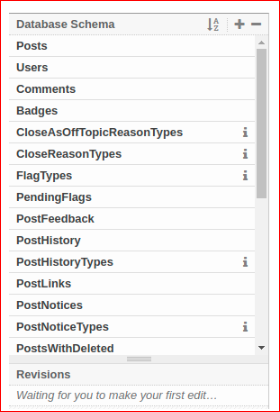

https://data.stackexchange.com/stackoverflow/query/new

In the image above we can see the names of each of the tables in the database. Clicking on the names will expand to show the columns of each table.

The gif below shows how we can run the query `SELECT * FROM tags;`.

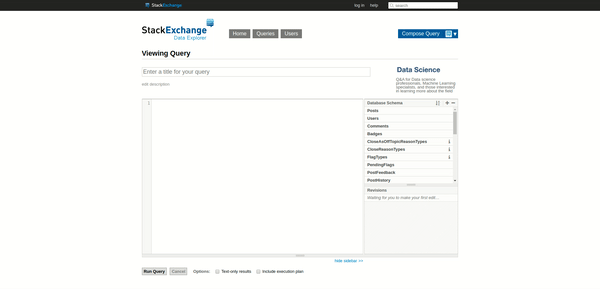

In [3]:
from IPython.display import Image

Image("run_query.gif")

Note that SEDE uses a different dialect ([Transact-SQL](https://en.wikipedia.org/wiki/Transact-SQL) — Microsoft's SQL) than SQLite. Most things are the same, but some are different. For instance, the query below selects the top 10 results from a query.

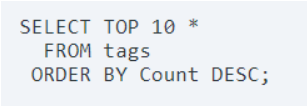

In SQLite we would not only use the keyword `LIMIT` instead of `TOP` we would also included it at the end of the query, instead of in the `SELECT` statement. 

If we run into any issues due to these differences, try to research on our own how to solve them. [Here's](https://www.mssqltips.com/sqlservertip/4777/comparing-some-differences-of-sql-server-to-sqlite/) a helpful resource.

The **posts table** has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

* **Id**: An identification number for the post.
* **PostTypeId**: An identification number for the type of post.

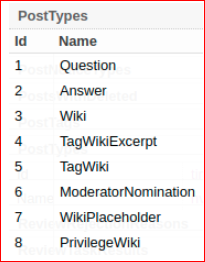

* **CreationDate**: The date and time of creation of the post.
* **Score**: The post's score.
* **ViewCount**: How many times the post was viewed.
* **Tags**: What tags were used.
* **AnswerCount**: How many answers the question got (only applicable to question posts).
* **FavoriteCount**: How many times the question was favored (only applicable to question posts).

Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

There are eight different types of post. Before we try to figure out which of them are relevant to us, let's check how many of them there are:

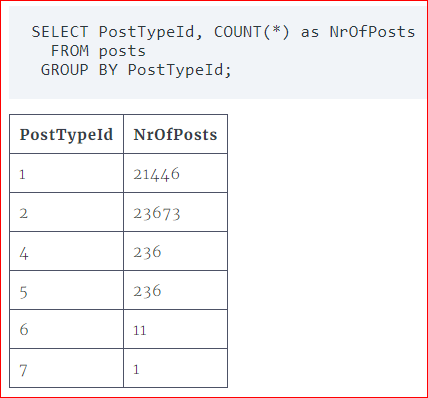

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020).

The dataset we'll be using in this project is one resulting from a possible solution to the following exercise.

Run a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019.

The result of the query was stored in a file called `2019_questions.csv`. Here are the first few rows of the data we got:

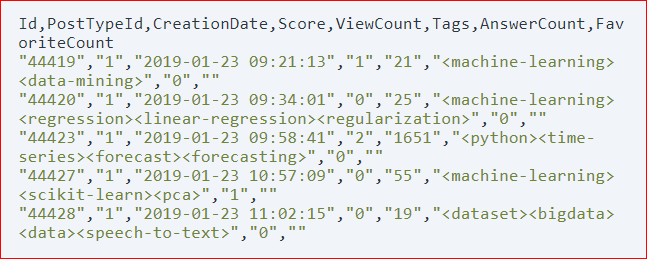

Looking at the of each row, it stands out that `FavouriteCount` has missing values. What other issues are there with the data? Let's explore it.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
questions = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"] )
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [96]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [97]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [98]:
questions["FavoriteCount"].isnull().sum()

7432

In [99]:
questions[questions["FavoriteCount"].notnull()].head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
17,44456,2019-01-23 17:29:04,2,188,<python><deep-learning><keras>,1,1.0
22,44474,2019-01-24 00:43:27,2,1810,<python><keras><tensorflow><gpu>,2,2.0
35,44501,2019-01-24 12:52:37,1,226,<time-series><anomaly-detection><online-learning>,0,2.0
48,44529,2019-01-24 21:18:18,1,47,<neural-network><autoencoder><topic-model>,0,1.0


In [100]:
questions.Tags.head()

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

We'll want to transform this string in something more suitable to use typical string methods.

In [101]:
questions["Tags"] = questions["Tags"].str.replace(">",",").str.replace("<","").str.split(",")

In [102]:
questions.fillna(0, inplace = True)

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count
* how many times the tag was used, and 
* how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

In [103]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining, ]",0,0.0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0.0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting, ]",0,0.0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca, ]",1,0.0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text, ]",0,0.0


# Count how many times each tag was used.


In [104]:
lst = []
for i in questions["Tags"]:
    for j in i:
        lst.append(j)
unique_tags = set(lst)

In [105]:
len(unique_tags)

527

In [106]:
tag_counts = {}
for i in unique_tags:
    tag_counts[i] = 0
            

In [107]:
for i in unique_tags:
    for j in questions["Tags"]:
        if i in j:
            tag_counts[i] += 1

In [108]:
del tag_counts[""] # remomving empty keys

In [109]:
print(len(tag_counts))

526


In [110]:
most_used = pd.Series(tag_counts) # converting dictionary into series
most_used = most_used.sort_values(ascending = False)
most_used.iloc[:20]

machine-learning          2693
python                    1814
deep-learning             1220
neural-network            1055
keras                      935
classification             685
tensorflow                 584
scikit-learn               540
nlp                        493
cnn                        489
time-series                466
lstm                       402
pandas                     354
regression                 347
dataset                    340
r                          268
predictive-modeling        265
clustering                 257
statistics                 234
machine-learning-model     224
dtype: int64

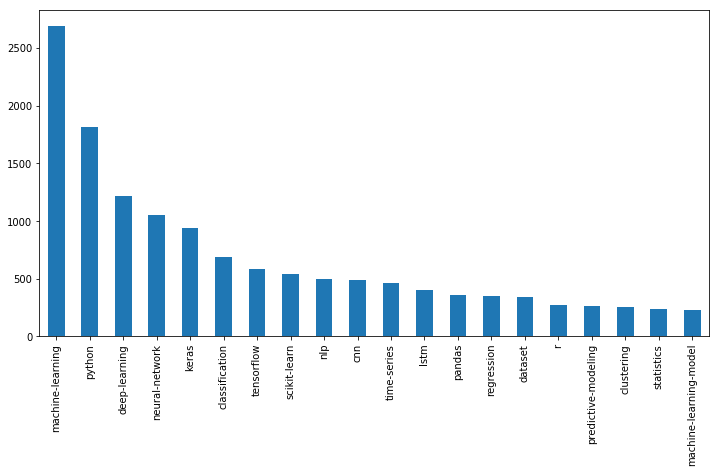

In [111]:
most_used.iloc[0:20].plot.bar(figsize = (12,6)) # top 20 tags
plt.show()

# Count how many times each tag was viewed.

In [112]:
tag_viewed = {}

for i in tag_counts:
    tag_viewed[i] = 0   

In [113]:
for i in tag_viewed:
    for j, k in zip(questions["Tags"], questions["ViewCount"]):
        if i in j:
            tag_viewed[i] += k
            

In [114]:
len(tag_viewed)

526

In [115]:
most_viewed = pd.Series(tag_viewed)
most_viewed = most_viewed.sort_values(ascending = False)
most_viewed[:20]

python              537585
machine-learning    388499
keras               268608
deep-learning       233628
pandas              201787
neural-network      185367
scikit-learn        128110
tensorflow          121369
classification      104457
dataframe            89352
lstm                 74458
nlp                  71382
cnn                  70349
time-series          64134
numpy                49767
regression           49451
dataset              43151
pytorch              40240
csv                  38654
clustering           33928
dtype: int64

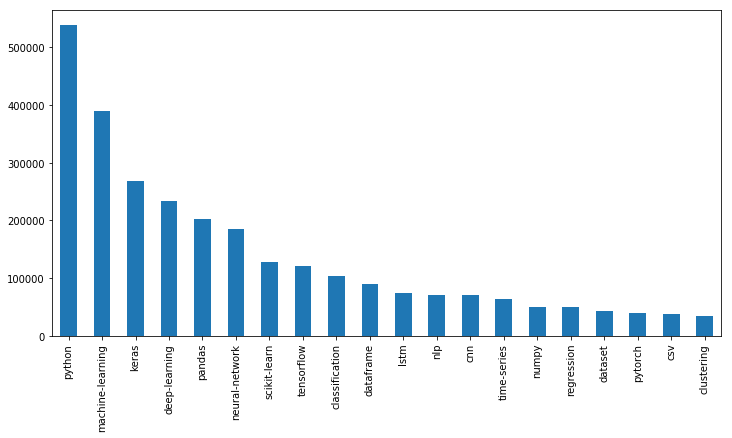

In [116]:
most_viewed[:20].plot.bar(figsize = (12,6))
plt.show()

In [117]:
most_used = pd.DataFrame(most_used[:20], columns = ["Count"]) # convert Series into Data Frame


In [118]:
most_viewed = pd.DataFrame(most_viewed[:20], columns = ["ViewCount"]) # convert Series into Data Frame


In [119]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used.sort_values(by = "Count")

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


The tags present in `most_used` and not present in `most_viewed` are:

* machine-learning-model
* statistics
* predictive-modeling
* r

In [123]:
# Similarly, let's see what tags are in the latter, but not the former:

(pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)).sort_values("ViewCount")

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


The tags present in `most_viewed` but not in `most_used` are:

* csv
* pytorch
* numpy
* dataframe

Some tags also stand out as being related. For example, 
* python is related to pandas, as we can find both **pythons** and **pandas** in the same country — or better yet, because `pandas` is a `Python` library. 

So by writing about pandas, we can actually simultaneously tackle two tags.

Other pairs of tags, shouldn't be related at all, like `pandas` and `r`:

In [124]:
questions[questions["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2873,60074,2019-09-11 20:35:17,0,22,"[r, pandas, dplyr, ]",0,0.0
3651,49148,2019-04-11 19:41:39,1,83,"[r, data-mining, pandas, matlab, databases, ]",3,0.0


Just two results. We can look at these questions by replacing ID in https://datascience.stackexchange.com/questions/ID with the questions' Ids values and see what they are about.

Task:
    
The goal of this exercise is to make us think about technical solutions to determining how tags are related. 

1. Brainstorm some ways in which we could find relationships between pair of tags.
2. Brainstorm some ways in which we could find relationships between multiple tags.

Although analytical solutions to the problem set forth above, they aren't necessarily needed, nor the best way to go about solving the problem.

Domain knowledge can be very useful. Let's see how it can help us here.

We may have noticed that the most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common:
* python,
* machine-learning, 
* deep-learning, 
* neural-network, 
* keras, 
* tensorflow, 
* classification, 
* scikit-learn.

Do we know what each of these or most of these tags means? Could there be strong relations between them?

**Task:**
    
Take a look at the [tags page](https://datascience.stackexchange.com/tags) on DSSE. Try to answer the questions above. Do additional research on the internet as needed.

Before we officially make our recommendation, it would be nice to solidy our findings with additional proof. More specifically, one thing that comes to mind is `"Is deep learning just a fad?"` Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? Back to SEDE!

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags.

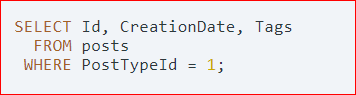

In this we will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [130]:
all_questions = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [132]:
all_questions["Tags"] = all_questions["Tags"].str.replace(">",",").str.replace("<","").str.split(",")

Task

1. Think about what questions should be classified as deep learning questions and the implement that definition.
2. Decide on an adequate timeframe and track interest in deep learning across that timeframe:
 * Count how many deep learning questions are asked per time period.
 * The total amount of questions per time period.
 * How many deep learning questions there are relative to the total amount of questions per time period;
* Write observations and final recommendation in a markdown cell.

Conclusion:

Our work allowed us to conclude that deep learning is the most popular topic right now.